In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

## Reading the dataset

In [110]:
bb_df=pd.read_csv('day.csv')

In [111]:
bb_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
# droping the columns which are not needed for analysis
bb_df=bb_df.drop(columns=['instant','dteday','atemp','casual','registered'])

In [113]:
# Converting the numerical columns into Categorical with Labeling 

bb_df.season=bb_df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bb_df.mnth=bb_df.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bb_df.weathersit=bb_df.weathersit.replace({1:'Clear',2:'Mist',3:'Light Snow' })
bb_df.weekday=bb_df.weekday.replace({6:'Saturday',0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday' })

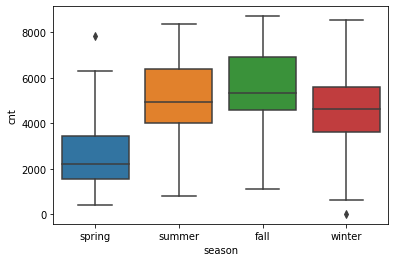

In [114]:
sns.boxplot(x='season',y='cnt',data=bb_df)

In [115]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


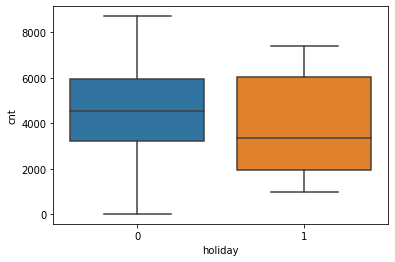

In [116]:
sns.boxplot(x='holiday',y='cnt',data=bb_df)

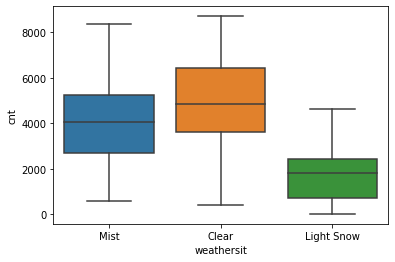

In [117]:
sns.boxplot(x='weathersit',y='cnt',data=bb_df)

In [120]:
a=pd.get_dummies(bb_df['mnth'],drop_first=True)
b=pd.get_dummies(bb_df['weathersit'],drop_first=True)
c=pd.get_dummies(bb_df['season'],drop_first=True)
d=pd.get_dummies(bb_df['weekday'],drop_first=True)

In [121]:
bb_df=pd.concat((bb_df,a),axis=1)
bb_df=pd.concat((bb_df,b),axis=1)
bb_df=pd.concat((bb_df,c),axis=1)
bb_df=pd.concat((bb_df,d),axis=1)

In [122]:
bb_df=bb_df.drop(columns=['mnth','weathersit','season','weekday'])

## Model 

In [123]:
from sklearn.model_selection import train_test_split

In [124]:

np.random.seed(0)
df_train,df_test=train_test_split(bb_df,train_size=0.7,test_size=0.3,random_state=100)

In [125]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
scaler=MinMaxScaler()

In [128]:
vars=['temp','hum','windspeed','cnt']

In [129]:
df_train[vars]=scaler.fit_transform(df_train[vars])

In [130]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,1,0,0,1,0,0,0,0


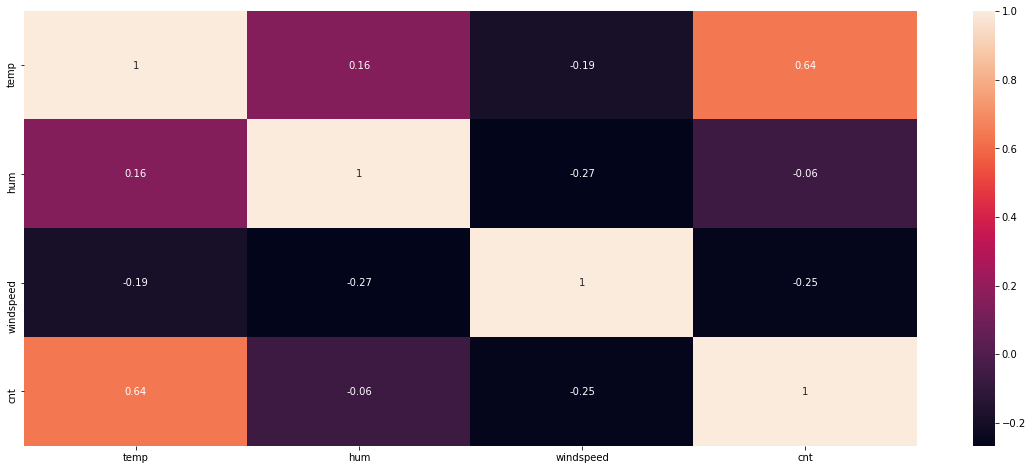

In [131]:
plt.figure(figsize=(20,8))

sns.heatmap(df_train[['temp','hum','windspeed','cnt']].corr(),annot=True)

In [132]:
y_train = df_train['cnt']
X_train= df_train.loc[:, df_train.columns !='cnt']

In [133]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


## Model sel

In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
rfe=RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Light Snow', 'Mist', 'spring', 'winter', 'Saturday', 'Sunday'],
      dtype='object')

## model using OLS

In [139]:
X_train_rfe=X_train[col]

In [140]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Light Snow', 'Mist', 'spring', 'winter', 'Saturday', 'Sunday'],
      dtype='object')

In [141]:
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm= sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.03e-190
Time:                        19:09:50   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.000       0.200       0.300
yr             0.2316      0.008     28.670      0.000       0.216       0.247
holiday       -0.0060      0.021     -0.284      0.776      -0.048       0.036
workingday     0.0965      0.009     10.419      0.000       0.078       0.115
temp           0.4610      0.031     14.686      0.000       0.399       0.523
hum           -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed     -0.1757      0.026     -6.878      0.000      -0.226      -0.126
Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep            0.0602      0.015      3.919      0.000       0.030       0.090
Light Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
Mist          -0.0593      0.010     -5.660      0.000      -0.080      -0.039
spring        -0.0979      0.015     -6.420      0.000      -0.128      -0.068
winter         0.0538      0.012      4.353      0.000       0.030       0.078
Saturday       0.1066      0.011      9.369      0.000       0.084       0.129
Sunday         0.0533      0.012      4.462      0.000       0.030       0.077
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                     1.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.48e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model 2

In [142]:
X_train_new=X_train_rfe.drop('holiday',axis=1)

In [143]:
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.03e-190
Time:                        19:09:51   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.000       0.166       0.323
yr             0.2316      0.008     28.670      0.000       0.216       0.247
workingday     0.1025      0.026      4.014      0.000       0.052       0.153
temp           0.4610      0.031     14.686      0.000       0.399       0.523
hum           -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed     -0.1757      0.026     -6.878      0.000      -0.226      -0.126
Jan           -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul           -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep            0.0602      0.015      3.919      0.000       0.030       0.090
Light Snow    -0.2538      0.026     -9.670      0.000      -0.305      -0.202
Mist          -0.0593      0.010     -5.660      0.000      -0.080      -0.039
spring        -0.0979      0.015     -6.420      0.000      -0.128      -0.068
winter         0.0538      0.012      4.353      0.000       0.030       0.078
Saturday       0.1126      0.027      4.171      0.000       0.060       0.166
Sunday         0.0593      0.027      2.186      0.029       0.006       0.113
==============================================================================
Omnibus:                       63.289   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.287
Skew:                          -0.629   Prob(JB):                     5.75e-36
Kurtosis:                       5.460   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
X_train_nc = X_train_new.drop(['const'], axis=1)

In [145]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.73
2,temp,18.10
1,workingday,17.04
12,Saturday,4.60
4,windspeed,4.55
13,Sunday,4.47
10,spring,3.11
9,Mist,2.28
11,winter,2.18
0,yr,2.09


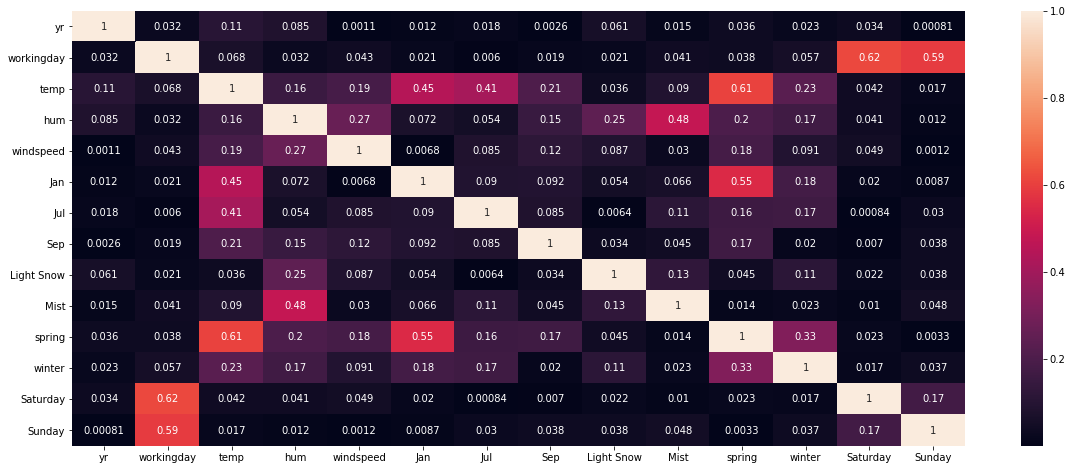

In [146]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),annot=True)

### Model 3

In [147]:
X_train_new=X_train_new.drop('Jan',axis=1)
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.81e-190
Time:                        19:09:52   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.000       0.155       0.311
yr             0.2307      0.008     28.473      0.000       0.215       0.247
workingday     0.1033      0.026      4.026      0.000       0.053       0.154
temp           0.4788      0.031     15.671      0.000       0.419       0.539
hum           -0.1466      0.038     -3.898      0.000      -0.221      -0.073
windspeed     -0.1686      0.025     -6.622      0.000      -0.219      -0.119
Jul           -0.0779      0.017     -4.560      0.000      -0.111      -0.044
Sep            0.0595      0.015      3.853      0.000       0.029       0.090
Light Snow    -0.2513      0.026     -9.541      0.000      -0.303      -0.200
Mist          -0.0594      0.011     -5.648      0.000      -0.080      -0.039
spring        -0.1067      0.015     -7.194      0.000      -0.136      -0.078
winter         0.0579      0.012      4.712      0.000       0.034       0.082
Saturday       0.1131      0.027      4.171      0.000       0.060       0.166
Sunday         0.0605      0.027      2.218      0.027       0.007       0.114
==============================================================================
Omnibus:                       61.396   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.940
Skew:                          -0.607   Prob(JB):                     3.07e-35
Kurtosis:                       5.450   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
X_train_nc = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
11,Saturday,4.57
4,windspeed,4.52
12,Sunday,4.45
9,spring,2.79
8,Mist,2.27
10,winter,2.15
0,yr,2.08


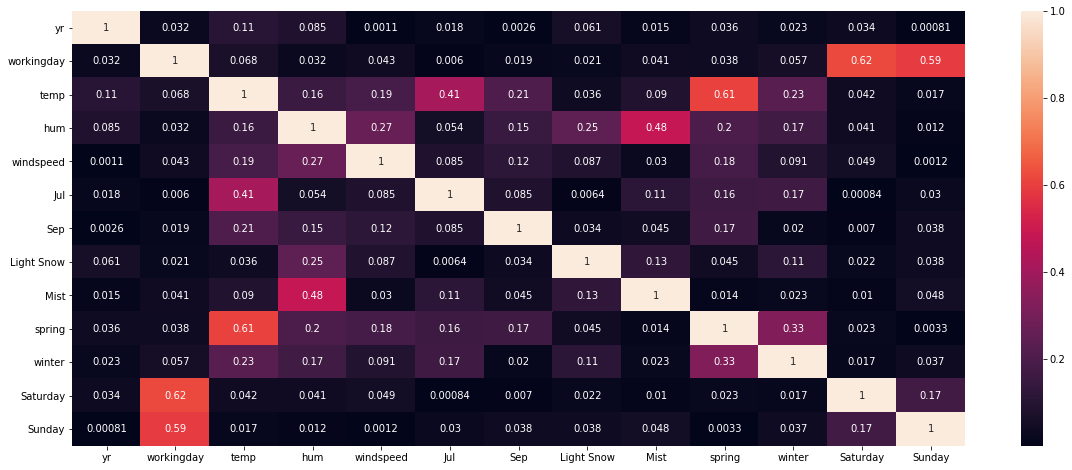

In [149]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),annot=True)

### Model 4

In [150]:
X_train_new=X_train_new.drop('Sunday',axis=1)
#X_train=X_train.drop(columns=['Nov'])
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train_new)
lm= sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.88e-190
Time:                        19:09:53   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2842      0.033      8.725      0.000       0.220       0.348
yr             0.2310      0.008     28.393      0.000       0.215       0.247
workingday     0.0518      0.011      4.714      0.000       0.030       0.073
temp           0.4786      0.031     15.602      0.000       0.418       0.539
hum           -0.1449      0.038     -3.837      0.000      -0.219      -0.071
windspeed     -0.1692      0.026     -6.616      0.000      -0.219      -0.119
Jul           -0.0769      0.017     -4.484      0.000      -0.111      -0.043
Sep            0.0572      0.015      3.699      0.000       0.027       0.088
Light Snow    -0.2505      0.026     -9.475      0.000      -0.302      -0.199
Mist          -0.0591      0.011     -5.600      0.000      -0.080      -0.038
spring        -0.1081      0.015     -7.269      0.000      -0.137      -0.079
winter         0.0566      0.012      4.596      0.000       0.032       0.081
Saturday       0.0617      0.014      4.358      0.000       0.034       0.090
==============================================================================
Omnibus:                       68.023   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.580
Skew:                          -0.653   Prob(JB):                     3.05e-41
Kurtosis:                       5.660   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
X_train_nc = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nc
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.18
2,temp,15.91
1,workingday,4.63
4,windspeed,4.12
9,spring,2.59
8,Mist,2.23
10,winter,2.09
0,yr,2.06
11,Saturday,1.82
5,Jul,1.40


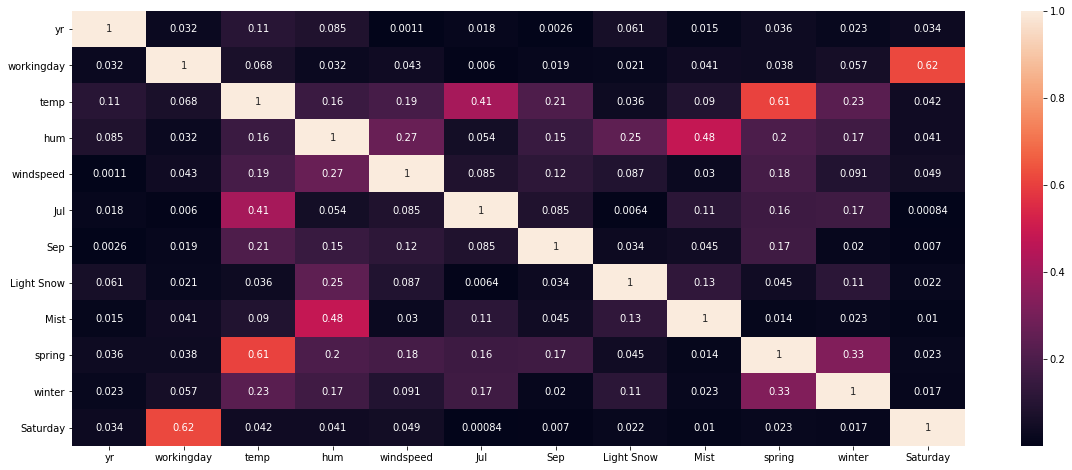

In [152]:
plt.figure(figsize=(20,8))

sns.heatmap(abs(X_train_nc.corr()),annot=True)

## Residual Analysis of the train data

In [153]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

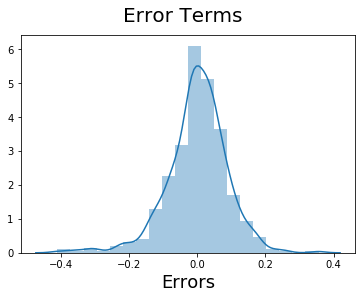

In [154]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [155]:
vars=['temp','hum','windspeed','cnt']
df_test[vars]=scaler.transform(df_test[vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [156]:
y_test = df_test['cnt']
X_test= df_test.loc[:, df_test.columns !='cnt']

In [157]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_nc.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [158]:
y_test_pred=lm.predict(X_test_new)

In [159]:
from sklearn.metrics import r2_score


In [160]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8203624502057987